
#Que-1) Delivery_time -> Predict delivery time using sorting time 




Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset=pd.read_csv('/content/delivery_time.csv')

In [7]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [9]:
dataset.shape

(21, 2)

In [10]:
dataset.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [11]:
dataset.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [12]:
#There is no Null value present in this data set and also the data types are appropriate in all attributes

#EDA and Data Visualization

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


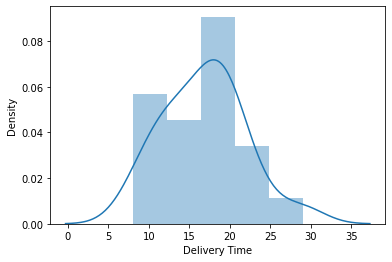

In [ ]:
sns.distplot(dataset['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


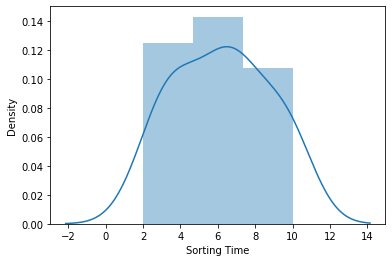

In [ ]:
sns.distplot(dataset['Sorting Time'])

In [18]:
dataset = dataset.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis = 1)
dataset

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#Correlation Analysis

In [19]:
dataset.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


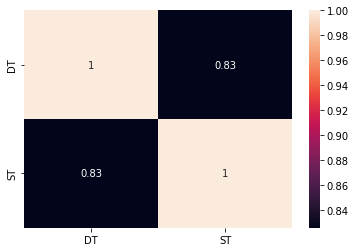

In [20]:
corrmatrix = dataset.corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

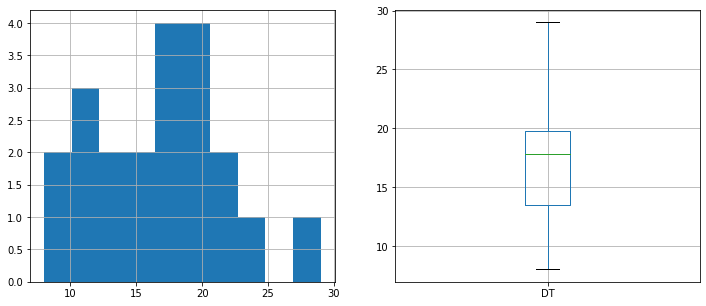

In [23]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
dataset['DT'].hist()
plt.subplot(1,2,2)
dataset.boxplot(column = ['DT'])
plt.show()

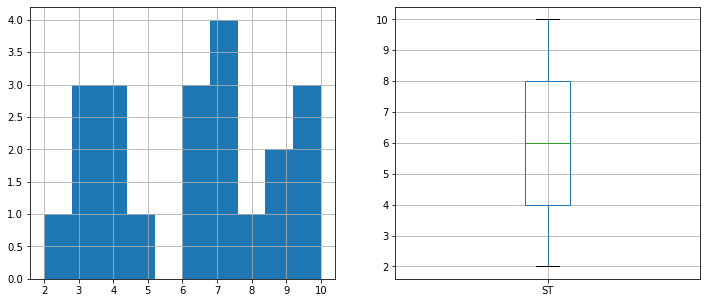

In [32]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
dataset['ST'].hist()
plt.subplot(1,2,2)
dataset.boxplot(column = ['ST'])
plt.show()

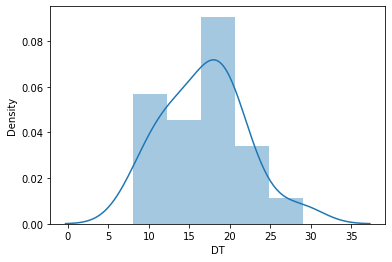

In [34]:
sns.distplot(dataset['DT'])
plt.show()

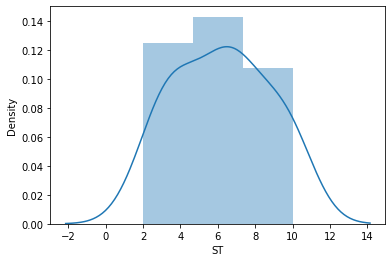

In [36]:
sns.distplot(dataset['ST'])
plt.show()

In [37]:
# Applying Stat models

In [38]:
model=smf.ols("DT~ST",data=dataset).fit()

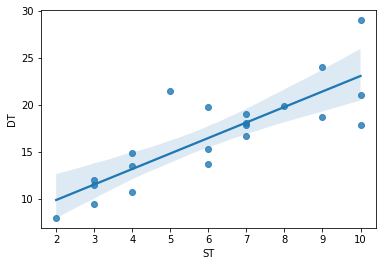

In [25]:
sns.regplot(x=dataset['ST'],y=dataset['DT'])

#Model Testing

In [39]:
# Finding Coefficient parameters
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [40]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64, Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [41]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        17:14:10   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Model Predictions

In [59]:
pred1 = model.predict(dataset.ST)
pred1

0     23.724217
1     13.235127
2     15.732529
3     21.351685
4     23.724217
5     15.732529
6     17.355841
7     12.361036
8     23.724217
9     21.351685
10    19.228893
11    13.235127
12    17.355841
13    12.361036
14    12.361036
15    13.235127
16    15.732529
17    17.355841
18    11.736686
19    17.355841
20    14.358958
dtype: float64

In [53]:
actual_1 = dataset.DT

In [54]:
rmse = sqrt(mean_squared_error(actual_1,pred1))
print(rmse)

2.7916503270617654


In [ ]:
# Applying Transformation

Model 1 - square transformation

In [62]:
model_1 = smf.ols(formula = 'DT~np.square(ST)',data = dataset).fit()
model_1

In [63]:
model_1.params

Intercept        11.237205
np.square(ST)     0.124870
dtype: float64

In [64]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.74e-05
Time:                        17:42:48   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2372      1.196      9.399      0.000       8.735      13.740
np.square(ST)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 2 - square root transformation

In [65]:
model_2 = smf.ols(formula = 'DT~np.sqrt(ST)',data = dataset).fit()
model_2

In [66]:
model_2.params

Intercept     -2.518837
np.sqrt(ST)    7.936591
dtype: float64

In [67]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           2.61e-06
Time:                        17:46:48   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(ST)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 3 - Log Transformation of X

In [69]:
model_3 = smf.ols(formula = 'np.log(DT)~ST',data = dataset).fit()
model_3

In [71]:
model_3.params

Intercept    2.121372
ST           0.105552
dtype: float64

In [73]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.59e-06
Time:                        17:52:12   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 4 - Log Transformation of Y

In [74]:
model_4 = smf.ols(formula = 'DT~np.log(ST)',data = dataset).fit()
model_4

In [75]:
model_4.params

Intercept     1.159684
np.log(ST)    9.043413
dtype: float64

In [76]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           2.64e-06
Time:                        17:55:54   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 5 - Log transformation of X & Y 

In [77]:
model_5 = smf.ols(formula = 'np.log(DT)~np.log(ST)',data = dataset).fit()
model_5

In [78]:
model_5.params

Intercept     1.741987
np.log(ST)    0.597522
dtype: float64

In [79]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.60e-07
Time:                        17:58:53   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(ST)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#out of all the above models, 5th models Residual is higher than other models, that is 0.772

#so the 5th model i.e log transformation of X & Y is the best Model to Predict Delivery time 

#Que-2) Salary_hike -> Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [84]:
dataset=pd.read_csv('/content/Salary_Data.csv')


In [85]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [88]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [91]:
dataset.shape

(30, 2)

In [92]:
dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
# there is no null value

#EDA and Data Visualization


In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


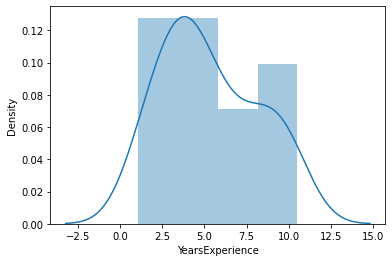

In [87]:
sns.distplot(dataset['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


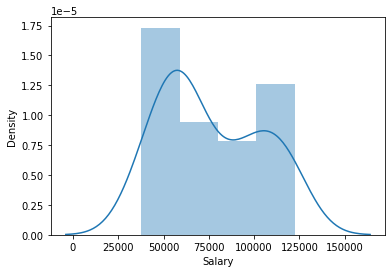

In [ ]:
sns.distplot(dataset['Salary'])

#Correlation Analysis

In [102]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


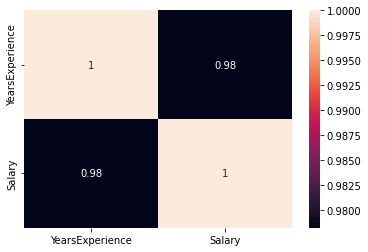

In [103]:
corrmatrix = dataset.corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

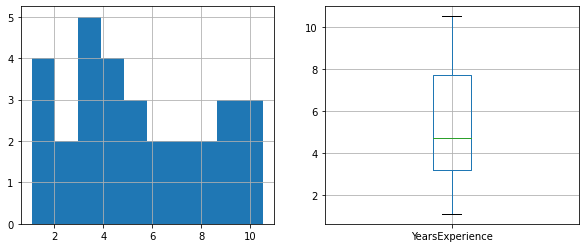

In [105]:
# outlier detection using Box plot
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
dataset['YearsExperience'].hist()
plt.subplot(1,2,2)
dataset.boxplot(column = ['YearsExperience'])

plt.show()

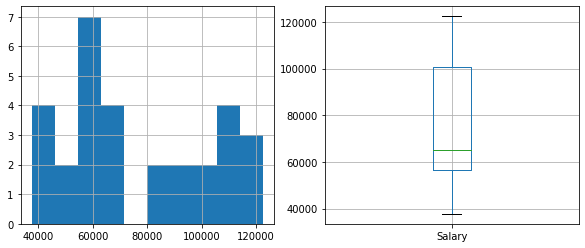

In [107]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
dataset['Salary'].hist()
plt.subplot(1,2,2)
dataset.boxplot(column = ['Salary'])

plt.show()

In [108]:
# above boxplot ,there are no outlier

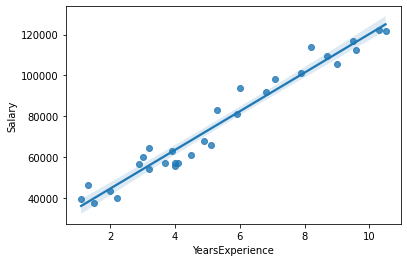

In [ ]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

#without applying any model

In [152]:
#fitting the model 

In [120]:
model_1=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [119]:
# Finding Cefficient Parameters
#Model-1
model_1.params

Intercept        11.237205
np.square(ST)     0.124870
dtype: float64

In [118]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.74e-05
Time:                        18:54:04   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2372      1.196      9.399      0.000       8.735      13.740
np.square(ST)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
#The above OLS-ordinary least square regression,R-Squared value is 0.957 > 0.75
#we can say that this Model is good to Predict Salary_hike 
#p-value < 0.05 and it is significant model

# Model Apply

In [124]:
# model-2 square Transformation

In [126]:
model_2 = smf.ols(formula = 'Salary~np.square(YearsExperience)',data = dataset).fit()
model_2

In [127]:
model_2.params

Intercept                     48042.585515
np.square(YearsExperience)      776.318773
dtype: float64

In [128]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.52e-16
Time:                        19:01:20   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(YearsExperience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Model-3 square root transformation

In [129]:
model_3 = smf.ols(formula = 'Salary~np.sqrt(YearsExperience)',data = dataset).fit()
model_3

In [130]:
model_3.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [131]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           8.57e-18
Time:                        19:02:43   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
#model-4 log transformation of X 

In [ ]:
model_4 = smf.ols(formula = 'np.log(Salary)~YearsExperience',data = dataset).fit()
model_4

In [143]:
model_4.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [144]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           7.03e-18
Time:                        19:15:01   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
#model-5 log transformation of Y 

In [145]:
model_5 = smf.ols(formula = 'Salary~np.log(YearsExperience)',data = dataset).fit()
model_5

In [148]:
model_5.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [149]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           3.25e-13
Time:                        19:16:36   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
#model-6 log transformation of X & Y

In [133]:
model_6 = smf.ols(formula = 'np.log(Salary)~np.log(YearsExperience)',data = dataset).fit()
model_6

In [134]:
model_6.params

Intercept                  10.328043
np.log(YearsExperience)     0.562089
dtype: float64

In [136]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           7.40e-16
Time:                        19:10:29   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Model_1 is  the Higher R-squared Value i.e. 0.957 as comapare to other Models

that is without Applying Any transformation.
Hence, the Model_1 is best model to predict Salary_hike
